In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("customer_details.csv")
df1=pd.read_csv("customer_policy_details.csv")

In [4]:
df

,0,1,2,3,4,5,6,7
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [5]:
df1

,0,1,2,3,4
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


In [ ]:
#i. Column Name for customer details table:

#customer_id, 
#Gender,
#age, 
#driving licence present,
#region code, 
#previously insured, 
#vehicle age and vehicle damage, in respective order. 

In [6]:
df.columns = ["customer_id","Gender","age","driving licence present","region code","previously insured","vehicle age","vehicle damage"]

In [ ]:
#ii. Column Name for customer_policy table:
#customer_id, 
#annual premium (in Rs), 
#sales channel code, 
#vintage and response. 

In [7]:
df1.columns= ["customer_id","annual premium (in Rs)","sales channel code","vintage","response"]

In [8]:
df.head()

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


In [9]:
df1.head()

,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0


In [ ]:
#2. Checking and Cleaning Data Quality:
#i. Null values

#Generate a summary of count of all the null values column wise
#Drop Null values for customer_id because central tendencies for id’s is not feasible.
#Replace all null values for numeric columns by mean. 
#Replace all null values for Categorical value by mode.

In [10]:
df.isnull().sum()

customer_id                386
Gender                     368
age                        368
driving licence present    393
region code                392
previously insured         381
vehicle age                381
vehicle damage             407
dtype: int64

In [11]:
df1.isnull().sum()

customer_id               387
annual premium (in Rs)    346
sales channel code        400
vintage                   388
response                  361
dtype: int64

In [12]:
#Drop Null values for customer_id because central tendencies for id’s is not feasible.

print("Null value in 'customer_id' : ", df["customer_id"].isnull().sum())
df=df.dropna(subset=["customer_id"])
print("Null value in 'customer_id' after droping : ",df["customer_id"].isnull().sum())

Null value in 'customer_id' :  386
Null value in 'customer_id' after droping :  0


In [14]:
df.head()

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


In [ ]:
#age,and region code contains numerical data where as driving licence present and previously insured contains categorical data.

In [16]:
# Replacing the NaN values of age by its mean value

df['age'].fillna(df['age'].mean(),inplace = True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [17]:
# Replacing the NaN values of region code by its mean value

df['region code'].fillna(df['region code'].mean(),inplace = True)

In [19]:
df1.head()

,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0


In [ ]:
#annual premium, sales channel code, and vintage contains numerical data where as responce has categorical data

In [20]:
# Replacing the NaN values of annual premium by its mean value
df1['annual premium (in Rs)'].fillna(df1['annual premium (in Rs)'].mean(),inplace = True)


In [21]:
# Replacing the NaN values of sales channel code by its mean value
df1['sales channel code'].fillna(df1['sales channel code'].mean(),inplace = True)

In [22]:
# Replacing the NaN values of vintage by its mean value
df1['vintage'].fillna(df1['vintage'].mean(),inplace = True)

In [23]:
#2.i.(d) Repalcing categorical null values by its mode.
# it replaces the null values with the value which exist maximum no of times i.e. mode
df['driving licence present'].fillna (df['driving licence present'].mode()[0], inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [24]:
# it replaces the null values with the value which exist maximum no of times i.e. mode
df['previously insured'].fillna (df['previously insured'].mode()[0], inplace=True)

In [26]:
# it replaces the null values with the value which exist maximum no of times i.e. mode

df1['response'].fillna(df1['response'].mode()[0], inplace=True)

In [ ]:
#2.(ii) OUTLIERS
#Generate a summary of count of all the outliers column wise
#Replace all outlier values for numeric columns by mean. 

<AxesSubplot:xlabel='age', ylabel='region code'>

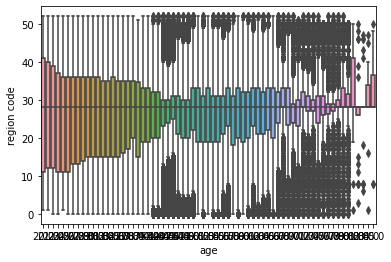

In [27]:
#(a). Summary of Count of Outliers
#In customer details table we need to calculate outliers for columns age and regional code.
#others are non-numerical columns so ignore them

sns.boxplot(x='age',y='region code',data=df)

<AxesSubplot:xlabel='age'>

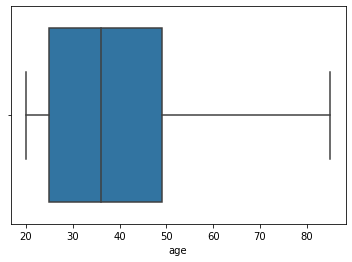

In [31]:
sns.boxplot(x="age",data=df)

<AxesSubplot:xlabel='region code'>

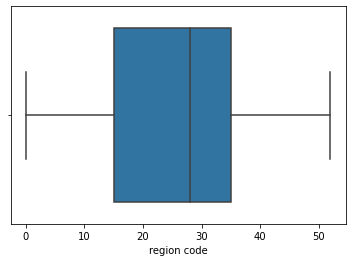

In [32]:
sns.boxplot(x="region code",data=df)

In [ ]:
#from the above boxplot figures we can easily understand there are no outliers for customer details table.
#lets see summary of the outliers for the customer details..

In [ ]:
# this functions finds outliers if present by IQR method..

In [33]:
df.describe()

,customer_id,age,driving licence present,region code,previously insured
count,380723.000000,380723.000000,380723.000000,380723.000000,380723.000000
mean,190548.776244,38.822788,0.997870,26.389436,0.457800
std,110016.805160,15.504826,0.046105,13.223671,0.498217
min,1.000000,20.000000,0.000000,0.000000,0.000000
25%,95269.500000,25.000000,1.000000,15.000000,0.000000
50%,190543.000000,36.000000,1.000000,28.000000,0.000000
75%,285822.500000,49.000000,1.000000,35.000000,1.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000


In [34]:
df1.describe()

,customer_id,annual premium (in Rs),sales channel code,vintage,response
count,380722.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190547.491663,30563.700273,112.035752,154.342437,0.122427
std,110013.824148,17192.448226,54.176488,83.626998,0.327779
min,1.000000,2630.000000,1.000000,10.000000,0.000000
25%,95276.250000,24414.000000,29.000000,82.000000,0.000000
50%,190536.500000,31657.000000,131.000000,154.000000,0.000000
75%,285818.750000,39391.000000,152.000000,227.000000,0.000000
max,381109.000000,540165.000000,163.000000,299.000000,1.000000


In [35]:
Q1=df.describe().loc["25%","age"]
Q3=df.describe().loc["75%","age"]

In [36]:
IQR=Q3-Q1

In [37]:
print(df.loc[df["age"]<(Q1-IQR*1.5),"age"].count())
print(df.loc[df["age"]>(Q3+IQR*1.5),"age"].count())

0
0


In [38]:
##### there are no outliers in 'age' column

Q1=df1.describe().loc["25%","annual premium (in Rs)"]
Q3=df1.describe().loc["75%","annual premium (in Rs)"]

In [39]:
IQR=Q3-Q1

In [40]:
print(df1.loc[df1["annual premium (in Rs)"]<(Q1-IQR*1.5),"annual premium (in Rs)"].count())
print(df1.loc[df1["annual premium (in Rs)"]>(Q3+IQR*1.5),"annual premium (in Rs)"].count())

0
10341


In [41]:
df1.loc[df1["annual premium (in Rs)"]>(Q3+IQR*1.5),"annual premium (in Rs)"]=df1["annual premium (in Rs)"].mean()
print(df1.loc[df1["annual premium (in Rs)"]>(Q3+IQR*1.5),"annual premium (in Rs)"].count())

0


In [42]:
Q1=df1.describe().loc["25%","vintage"]
Q3=df1.describe().loc["75%","vintage"]

In [43]:
IQR=Q3-Q1

In [44]:
print(df1.loc[df1["vintage"]<(Q1-IQR*1.5),"vintage"].count())
print(df1.loc[df1["vintage"]>(Q3+IQR*1.5),"vintage"].count())

0
0


In [ ]:
##### there are no outliers in 'vintage' column

In [45]:
df.head()

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


In [46]:

### White spaces

df["Gender"]=df["Gender"].str.strip()
df["vehicle age"]=df["vehicle age"].str.strip()
df["vehicle damage"]=df["vehicle damage"].str.strip()

C:\Users\User\AppData\Local\Temp/ipykernel_20396/1217648460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"]=df["Gender"].str.strip()
C:\Users\User\AppData\Local\Temp/ipykernel_20396/1217648460.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["vehicle age"]=df["vehicle age"].str.strip()
C:\Users\User\AppData\Local\Temp/ipykernel_20396/1217648460.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [47]:
### case correction(lower or upper, any one)

df["Gender"]=df["Gender"].str.lower()
df["vehicle age"]=df["vehicle age"].str.lower()
df["vehicle damage"]=df["vehicle damage"].str.lower()

C:\Users\User\AppData\Local\Temp/ipykernel_20396/975973477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"]=df["Gender"].str.lower()
C:\Users\User\AppData\Local\Temp/ipykernel_20396/975973477.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["vehicle age"]=df["vehicle age"].str.lower()
C:\Users\User\AppData\Local\Temp/ipykernel_20396/975973477.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [48]:
df.head()

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage
0,1.0,male,44.0,1.0,28.0,0.0,> 2 years,yes
1,2.0,male,76.0,1.0,3.0,0.0,1-2 year,no
2,3.0,male,47.0,1.0,28.0,0.0,> 2 years,yes
3,4.0,male,21.0,1.0,11.0,1.0,< 1 year,no
4,5.0,female,29.0,1.0,41.0,1.0,< 1 year,no


In [49]:
### creating dummies

dummies_gender=pd.get_dummies(df["Gender"])
dummies_vehicle_age=pd.get_dummies(df["vehicle age"])
dummies_vehicle_damage=pd.get_dummies(df["vehicle damage"])
dummies_d_l_p=pd.get_dummies(df["driving licence present"])
dummies_p_i=pd.get_dummies(df["previously insured"])
dummies_response=pd.get_dummies(df1["response"])

In [50]:
### checking for any duplicates

print(df.duplicated().sum())
print(df1.duplicated().sum())

0
0


In [ ]:
#3. Create a Master table for future use.
#Join the customer table and customer_policy table to get a master table using customer_id in both tables.

In [51]:
master_df=pd.merge(df,df1,on='customer_id')
master_df

,customer_id,Gender,age,driving licence present,region code,previously insured,vehicle age,vehicle damage,annual premium (in Rs),sales channel code,vintage,response
0,1.0,male,44.0,1.0,28.0,0.0,> 2 years,yes,40454.0,26.0,217.0,1.0
1,2.0,male,76.0,1.0,3.0,0.0,1-2 year,no,33536.0,26.0,183.0,0.0
2,3.0,male,47.0,1.0,28.0,0.0,> 2 years,yes,38294.0,26.0,27.0,1.0
3,4.0,male,21.0,1.0,11.0,1.0,< 1 year,no,28619.0,152.0,203.0,0.0
4,5.0,female,29.0,1.0,41.0,1.0,< 1 year,no,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
380331,381105.0,male,74.0,1.0,26.0,1.0,1-2 year,no,30170.0,26.0,88.0,0.0
380332,381106.0,male,30.0,1.0,37.0,1.0,< 1 year,no,40016.0,152.0,131.0,0.0
380333,381107.0,male,21.0,1.0,30.0,1.0,< 1 year,no,35118.0,160.0,161.0,0.0
380334,381108.0,female,68.0,1.0,14.0,0.0,> 2 years,yes,44617.0,124.0,74.0,0.0


In [ ]:
#4. Company needs some important information from the master table to make decisions for future growth.They needs following information:

#i. Gender wise average annual premium
#ii. Age wise average annual premium
#iii. Is your data balanced between the genders?
#(Hint: Data is balanced if number of counts in each group is approximately same)
#iv. Vehicle age wise average annual premium.

In [54]:
aap_gender_df=master_df.groupby(["Gender"])["annual premium (in Rs)"].mean()
aap_gender_df

Gender
female    29273.466160
male      29323.013932
Name: annual premium (in Rs), dtype: float64

In [55]:
aap_age_df=master_df.groupby(["age"])["annual premium (in Rs)"].mean()
aap_age_df

age
20.0    26342.069228
21.0    29751.786387
22.0    29946.842715
23.0    29838.339020
24.0    30125.550396
            ...     
81.0    29287.894657
82.0    36480.575871
83.0    28995.804558
84.0    35440.818182
85.0    26637.427298
Name: annual premium (in Rs), Length: 67, dtype: float64

In [56]:
#data is balanced between the two genders because the avereages are approximately equal
aap_gender_df

Gender
female    29273.466160
male      29323.013932
Name: annual premium (in Rs), dtype: float64

In [57]:
#iv. Vehicle age wise average annual premium.
aap_vehicle_df=master_df.groupby(["vehicle age"])["annual premium (in Rs)"].mean()
aap_vehicle_df

vehicle age
1-2 year     29099.057288
< 1 year     29188.144466
> 2 years    32943.522260
Name: annual premium (in Rs), dtype: float64

In [ ]:
#5. Is there any relation between Person Age and annual premium?

#Hint: use correlation function (Correlation describes the relationship between two variables). 
#Correlation coefficient < -0.5           - Strong negative relationship
#Correlation coefficient > 0.5            -  Strong positive relationship
#0.5 < Correlation coefficient < 0.5   - There is no relationship. 

In [59]:
Correlation_coefficient= master_df['age'].corr(master_df["annual premium (in Rs)"])

In [60]:
print(Correlation_coefficient)

0.05065739217768371


In [ ]:
# there is no relationship between Person age and annual premium because Correlation coefficient<0.5